In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import pickle

In [270]:
df=pd.read_csv("ai4i2020.csv")

In [271]:
df_origin=df.copy()

In [21]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [22]:
df.describe(include='all')

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
unique,NaN,10000,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,L51017,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,NaN,NaN,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,NaN,NaN,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,NaN,NaN,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,NaN,NaN,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,NaN,NaN,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,NaN,NaN,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


In [23]:
pf=ProfileReport(df)

In [24]:
pf.to_widgets()

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [155]:
pf.to_file('pd_profiling.html')

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Findings from Overview section......
### Unique ID's like UID and Product_ID are irrelevant for predictive model, we can drop them.
### There are 10,000 observations with 14 features , out of which 6 are numeric and 8 are categorical.
### No duplicates are found.
### No missing values

# Findings from target column-Air Temparature
### This is a categorical field with three categories (L,M and H)-L is having highest distribution of 6000 observations, H- is having 1003 nos of lowest no of observations and M is having 2997 no of observations.

# Findings from target column-Air Temparature
### This is our target column.
### Data is normally distributed with mean and median at  300 and standard deviation of 2.

# Findings from Process temperature [K]
### data is normally distributed with mean and median at 310 and with a standard deviation of 1.48

# Findings from Rotational speed [rpm]
### data is skewed towards right (right tailed) with a skewness 1.99 i.e some outliers are present in +ve side.
### But normally distributed between 1168 and 1750
### few of data points between 1800 and 2826 are seems outliers 

# Findings from Torque [Nm]
### data is normally distributed with a mean and median at 40 and standard deviation of 9.96.
### Negligible skewness.

# Findings from Tool wear [min]
### Maximim data points except few are having same frequencies lies between 200 to 250
### No missing values but Zeros are there.
### little skewneed towards right.

# Findings from Machine failure
### It is a categorical field of failure or not failure.
### 9661 times machine get failure whereas 339 times machine not get failured.

# Findings from TWF
### It is a caregorical field having values 0 (9954 observations )and 1  (46 observations)

# Findings from HDF
### It is a caregorical field having values 0 (9885 observations )and 1  (115 observations)

# Findings from PWF
### It is a caregorical field having values 0 (9905 observations )and 1  (95 observations)

# Findings from OSF
### It is a caregorical field having values 0 (9902 observations )and 1  (98 observations)

# Findings from RNF
### It is a caregorical field having values 0 (9981 observations )and 1  (19 observations)

In [159]:
df.corr()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,1.000000,0.117428,0.324428,-0.001266,0.003207,-0.010794,-0.022892,0.009154,-0.022215,-0.023557,-0.000990,-0.005954
Air temperature [K],0.117428,1.000000,0.876107,0.018303,-0.013778,0.013595,0.082556,0.009955,0.137831,0.003470,0.001988,0.017688
Process temperature [K],0.324428,0.876107,1.000000,0.018863,-0.014061,0.013027,0.035946,0.007315,0.056933,-0.003355,0.004554,0.022279
Rotational speed [rpm],-0.001266,0.018303,0.018863,1.000000,-0.917809,0.001387,-0.162414,0.008995,-0.169814,-0.014475,-0.145916,-0.011708
Torque [Nm],0.003207,-0.013778,-0.014061,-0.917809,1.000000,-0.001729,0.191321,-0.014662,0.142610,0.083781,0.183465,0.016136
Tool wear [min],-0.010794,0.013595,0.013027,0.001387,-0.001729,1.000000,0.106309,0.116444,-0.003572,-0.006151,0.156604,0.010614
Machine failure,-0.022892,0.082556,0.035946,-0.162414,0.191321,0.106309,1.000000,0.362904,0.575800,0.522812,0.531083,0.004516
TWF,0.009154,0.009955,0.007315,0.008995,-0.014662,0.116444,0.362904,1.000000,-0.007332,0.008577,0.038243,0.030970
HDF,-0.022215,0.137831,0.056933,-0.169814,0.142610,-0.003572,0.575800,-0.007332,1.000000,0.018443,0.046396,-0.004706
PWF,-0.023557,0.003470,-0.003355,-0.014475,0.083781,-0.006151,0.522812,0.008577,0.018443,1.000000,0.115836,-0.004273


# Correlation-

### Dependent variable Air Temperature is having +ve high correlation with Process Temperature whereas very less correlation with other independent varibales.
### Machine Failure is having multi-colenearity between HDF,PWF and OSF

# Let us do  some analysis through stats models

In [184]:
df1=df.rename({'Air temperature [K]':'Air_temp','Process temperature [K]':'process_temp',
               'Rotational speed [rpm]':'Rotaional_speed','Torque [Nm]':'Torque','Tool wear [min]':'Tool_wear','Machine failure':'Machine_failure'},axis=1)

In [185]:
df1.head()

,UDI,Product ID,Type,Air_temp,process_temp,Rotaional_speed,Torque,Tool_wear,Machine_failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,0.316214,42.8,109.262146,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,0.316214,46.3,3.000000,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,0.316214,49.4,5.000000,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,0.316214,39.5,7.000000,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,0.316214,40.0,9.000000,0,0,0,0,0,0


In [180]:
import statsmodels.formula.api as smf
# Statistically model of Ordinary least squared approach.
def smf_check(col1,col2,data):
    lm = smf.ols(formula=f"{col1}~ {col2}", data=data).fit()
    return lm.summary()

In [181]:
# If we are going to create a model where Air_temp is the label column and process_temp is independent column
smf_check('Air_temp','process_temp',df1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Air_temp   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                 3.302e+04
Date:                Wed, 01 Sep 2021   Prob (F-statistic):               0.00
Time:                        22:00:11   Log-Likelihood:                -13826.
No. Observations:               10000   AIC:                         2.766e+04
Df Residuals:                    9998   BIC:                         2.767e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -66.1432      2.015    -32.824      0.000     -70.093     -62.193
process_temp     1.1811      0.007    181.703      0.000       1.168       1.194
==============================================================================
Omnibus:                      670.862   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              243.880
Skew:                          -0.082   Prob(JB):                     1.10e-53
Kurtosis:                       2.253   Cond. No.                     6.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [189]:
# p-value is high for categorical features like Machine_failure,TWF,PWF& OSF , so not more significance for Air_temp prediction (0.05 or less is good)
smf_check('Air_temp','Machine_failure+TWF+HDF+PWF+OSF+RNF',df1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Air_temp   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     33.08
Date:                Wed, 01 Sep 2021   Prob (F-statistic):           1.01e-39
Time:                        22:44:13   Log-Likelihood:                -21023.
No. Observations:               10000   AIC:                         4.206e+04
Df Residuals:                    9993   BIC:                         4.211e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         299.9725      0.020   1.49e+04      0.000     299.933     300.012
Machine_failure     0.1175      0.376      0.313      0.755      -0.619       0.854
TWF                 0.2041      0.455      0.449      0.654      -0.688       1.096
HDF                 2.4829      0.397      6.256      0.000       1.705       3.261
PWF                -0.0701      0.382     -0.184      0.854      -0.819       0.678
OSF                -0.1948      0.365     -0.534      0.594      -0.910       0.520
RNF                 0.8264      0.455      1.815      0.069      -0.066       1.719
==============================================================================
Omnibus:                      821.323   Durbin-Watson:                   0.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              287.436
Skew:                           0.135   Prob(JB):                     3.84e-63
Kurtosis:                       2.214   Cond. No.                         39.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Missing Value Analysis
### There is no missing NULL values in the datset however there is Zero's in some of attirbutes.
### Except Tool wear all there attributes are categorical where zero values are there respresents some mennings
### Before handling Zero present in Tool wear , we need to understand what these zeros are represents or it is due to some wrong enties.

In [15]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [16]:
(df==0).sum()

UDI                           0
Product ID                    0
Type                          0
Air temperature [K]           0
Process temperature [K]       0
Rotational speed [rpm]        0
Torque [Nm]                   0
Tool wear [min]             120
Machine failure            9661
TWF                        9954
HDF                        9885
PWF                        9905
OSF                        9902
RNF                        9981
dtype: int64

# Also it has been observevd that the categorical fields are already in numerical form , so no need to further trarnsform them.

In [17]:
# lET US REPLACE ZEROS WITH NAN FOR Tool wear [min] column

In [272]:
df['Tool wear [min]']=df['Tool wear [min]'].replace(0,np.nan)

In [273]:
(df==0).sum()

UDI                           0
Product ID                    0
Type                          0
Air temperature [K]           0
Process temperature [K]       0
Rotational speed [rpm]        0
Torque [Nm]                   0
Tool wear [min]               0
Machine failure            9661
TWF                        9954
HDF                        9885
PWF                        9905
OSF                        9902
RNF                        9981
dtype: int64

In [274]:
df['Tool wear [min]'].mean()

109.26214574898785

In [275]:
df['Tool wear [min]'].median()

109.0

In [276]:
mean=df['Tool wear [min]'].mean()
df['Tool wear [min]'].fillna(mean,inplace=True)

In [277]:
# Skewness
df['Rotational speed [rpm]'].skew()

1.9931710047137523

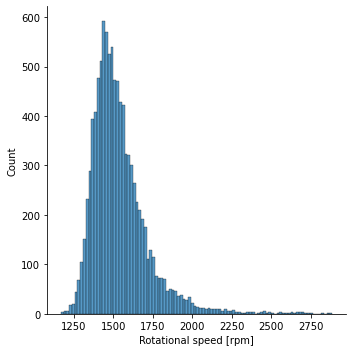

In [278]:
sns.displot(df['Rotational speed [rpm]'])

In [279]:
# Log transformer

In [280]:
x_log=np.log(df['Rotational speed [rpm]'])

In [281]:
x_log.skew()

1.309369616254158

In [282]:
df['Torque [Nm]'].skew()

-0.00951659584005855

In [283]:
df['Tool wear [min]'].skew()

0.027619124531084782

In [284]:
# Square Root transformer

In [285]:
x_sqrt=np.sqrt(df['Rotational speed [rpm]'])
x_sqrt.skew()

1.6244072136980985

In [286]:
# Box-cox transformer

In [287]:
from scipy import stats
x_boxcox=stats.boxcox(df['Rotational speed [rpm]'])[0]
pd.Series(x_boxcox).skew()

0

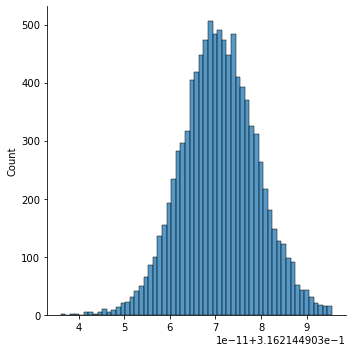

In [288]:
sns.displot(pd.Series(x_boxcox))

In [289]:
# Aplying Boxcox as final transformation for Rotational speed attribute

In [290]:
df['Rotational speed [rpm]']=pd.Series(x_boxcox)

In [291]:
df['Rotational speed [rpm]']

0       0.316214
1       0.316214
2       0.316214
3       0.316214
4       0.316214
          ...   
9995    0.316214
9996    0.316214
9997    0.316214
9998    0.316214
9999    0.316214
Name: Rotational speed [rpm], Length: 10000, dtype: float64

# Feature Scalling

### ML algorithms not perform well if the inpput numerical attributes are not in one scale or they are in different scales.
### In our dataset we have observed that , total number of romms ranges from 6 to 39k while income ranges from 0 to 15
### Scaling of target value is not required.

#### There are two type of scalling:
                * a. MinMaxScaler (rescaled all values and normalized between o and 1)
                * b. Standardization
    . MinMaxScaler: subtracting the min value and dividing by the max minus min.( give value between o and 1)
    . Standardization: first it subtracts the mean value and then divies by standard deviation so the distribution 
    has unit variance and will always have zero mean.
        

In [292]:
df_origin.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [293]:
df_origin.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [294]:
df_origin.Type.unique()

array(['M', 'L', 'H'], dtype=object)

In [295]:
df_origin.shape

(10000, 14)

In [296]:
x

,Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type1,Type2,Type3,TWF,HDF,PWF,OSF,RNF
0,-1.401826,-1.224745,1.414214,-1.224745,0.0,1.0,0.0,0,0,0,0,0
1,0.862662,1.224745,-0.707107,1.224745,0.0,0.0,1.0,1,0,1,1,0
2,0.539164,0.000000,-0.707107,0.000000,1.0,0.0,0.0,1,1,1,1,1


In [297]:
x.shape

(3, 12)

# Seprating out dependent and indepedent features

In [298]:
x=df_origin.drop(['Air temperature [K]','UDI','Product ID'],axis=1)

In [299]:
y=df_origin['Air temperature [K]']

#  Selecting Numerical Columns

In [300]:
x.dtypes

Type                        object
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

In [301]:
x_num=x[['Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']]
x_cat_notransform=x[['Machine failure','TWF','HDF','PWF','OSF','RNF']]
x_cat_transform=x[['Type']]

num_attributes=list(x_num)
cat_attribute_trans=list(x_cat_transform)
cat_attribute_notrans=list(x_cat_notransform)

In [302]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaller',StandardScaler()),
])

In [303]:
(x_num==0).sum()

Process temperature [K]      0
Rotational speed [rpm]       0
Torque [Nm]                  0
Tool wear [min]            120
dtype: int64

In [304]:
x_num['Tool wear [min]']=x_num['Tool wear [min]'].replace(0.,np.nan)

<ipython-input-304-3cf0689d2903>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_num['Tool wear [min]']=x_num['Tool wear [min]'].replace(0.,np.nan)


In [305]:
(x_num==0).sum()

Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
dtype: int64

In [306]:
x_num.isnull().sum()

Process temperature [K]      0
Rotational speed [rpm]       0
Torque [Nm]                  0
Tool wear [min]            120
dtype: int64

In [307]:
type(x_num)

pandas.core.frame.DataFrame

In [308]:
#x_num['Tool wear [min]']=x_num['Tool wear [min]'].replace(0.,np.nan)
x_num_transform=num_pipeline.fit_transform(x_num)

In [309]:
#numerics=['int16','int32','int64','float16','float32','float64']
#x_num=x.select_dtypes(include=numerics)

In [310]:
x_num.values

array([[ 308.6, 1551. ,   42.8,    nan],
       [ 308.7, 1408. ,   46.3,    3. ],
       [ 308.5, 1498. ,   49.4,    5. ],
       ...,
       [ 308.6, 1645. ,   33.4,   22. ],
       [ 308.7, 1408. ,   48.5,   25. ],
       [ 308.7, 1500. ,   40.2,   30. ]])

In [311]:
# Visualizing the normalized data

In [312]:
x_num_trs_df=pd.DataFrame(x_num_transform)

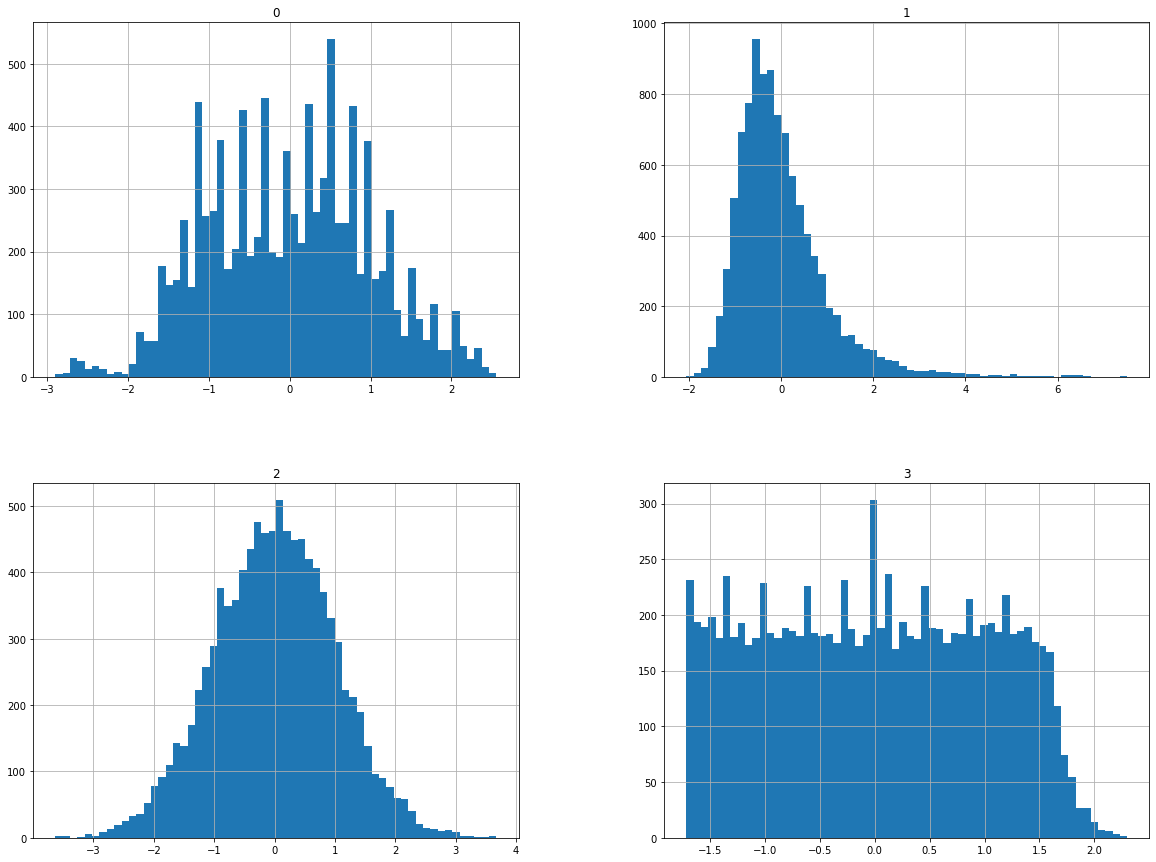

In [313]:
x_num_trs_df.hist(bins=60,figsize=(20,15))
plt.show()

# Creating a full pipeline

In [314]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
num_attributes=list(x_num)
cat_attribute_trans=list(x_cat_transform)
cat_attribute_notrans=list(x_cat_notransform)

In [315]:
num_attributes

['Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]']

In [316]:
full_pipeline=ColumnTransformer([
    ("num",num_pipeline,num_attributes),
    ("cat",OneHotEncoder(),cat_attribute_trans),
])

In [317]:
x_prepared=full_pipeline.fit_transform(x)

In [318]:
x_prepared_df=pd.DataFrame(x_prepared,columns=['Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]','Type1','Type2','Type3'])

In [319]:
x_prepared_df

,Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type1,Type2,Type3
0,-0.947360,0.068185,0.282200,-1.695984,0.0,0.0,1.0
1,-0.879959,-0.729472,0.633308,-1.648852,0.0,1.0,0.0
2,-1.014761,-0.227450,0.944290,-1.617430,0.0,1.0,0.0
3,-0.947360,-0.590021,-0.048845,-1.586009,0.0,1.0,0.0
4,-0.879959,-0.729472,0.001313,-1.554588,0.0,1.0,0.0
...,...,...,...,...,...,...,...
9995,-1.082162,0.363820,-1.052012,-1.476034,0.0,0.0,1.0
9996,-1.082162,0.520005,-0.821283,-1.428902,1.0,0.0,0.0
9997,-0.947360,0.592519,-0.660777,-1.350349,0.0,0.0,1.0
9998,-0.879959,-0.729472,0.854005,-1.303217,1.0,0.0,0.0


In [320]:
x=pd.concat((x_prepared_df,x_cat_notransform),axis=1)

In [321]:
x

,Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type1,Type2,Type3,Machine failure,TWF,HDF,PWF,OSF,RNF
0,-0.947360,0.068185,0.282200,-1.695984,0.0,0.0,1.0,0,0,0,0,0,0
1,-0.879959,-0.729472,0.633308,-1.648852,0.0,1.0,0.0,0,0,0,0,0,0
2,-1.014761,-0.227450,0.944290,-1.617430,0.0,1.0,0.0,0,0,0,0,0,0
3,-0.947360,-0.590021,-0.048845,-1.586009,0.0,1.0,0.0,0,0,0,0,0,0
4,-0.879959,-0.729472,0.001313,-1.554588,0.0,1.0,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-1.082162,0.363820,-1.052012,-1.476034,0.0,0.0,1.0,0,0,0,0,0,0
9996,-1.082162,0.520005,-0.821283,-1.428902,1.0,0.0,0.0,0,0,0,0,0,0
9997,-0.947360,0.592519,-0.660777,-1.350349,0.0,0.0,1.0,0,0,0,0,0,0
9998,-0.879959,-0.729472,0.854005,-1.303217,1.0,0.0,0.0,0,0,0,0,0,0


In [322]:
y

0       298.1
1       298.2
2       298.1
3       298.2
4       298.2
        ...  
9995    298.8
9996    298.9
9997    299.0
9998    299.0
9999    299.0
Name: Air temperature [K], Length: 10000, dtype: float64

# Let's check multi co-liearity through vif ( variance inflation factor):1/[1-R^2]

In [323]:
# Scalled array
arr=x.to_numpy()

In [324]:
arr.shape

(10000, 13)

In [325]:
# inputs to VIF are array and the indexes 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df = pd.DataFrame()
vif_df['vif'] = [variance_inflation_factor(arr,i) for i in range(arr.shape[1])]
vif_df['feature']  = x.columns

In [326]:
vif_df

,vif,feature
0,1.005125,Process temperature [K]
1,5.171742,Rotational speed [rpm]
2,5.236178,Torque [Nm]
3,1.039958,Tool wear [min]
4,1.003661,Type1
5,1.033789,Type2
6,1.009655,Type3
7,11.831631,Machine failure
8,2.433909,TWF
9,4.597177,HDF


# The variance inflation factor for Machine Failure is very high >10, so it is having multi-coleanirty, we can remove this feature as multi colinearity increases the variance of coefficients in regression.

In [327]:
x.drop('Machine failure',axis=1,inplace=True)

In [401]:
from sklearn.model_selection import train_test_split 
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.2,random_state=42)

In [402]:
train_x.shape,train_y.shape,test_x.shape,test_y.shape

((8000, 12), (8000,), (2000, 12), (2000,))

In [403]:
# Creating the MODEL

In [404]:
linear = LinearRegression()

In [405]:
linear.fit(train_x,train_y)

LinearRegression()

In [406]:
linear.coef_

array([ 1.74261129e+00,  4.16716787e-02,  1.71574052e-02,  6.03906120e-03,
       -3.10118352e-02,  4.98835639e-04,  3.05129996e-02,  7.87679956e-02,
        1.71514527e+00,  6.88762994e-02, -1.77708081e-01, -2.13492363e-02])

In [407]:
linear.intercept_

299.98264242277685

In [408]:
# training score
linear.score(train_x,train_y)

0.7792962121552691

In [409]:
# Saving the model

In [410]:
file='linear_reg.sav'
pickle.dump(linear,open(file,'wb'))

In [411]:
# Using/Loading the saved model

In [412]:
model = pickle.load(open('linear_reg.sav','rb'))

In [413]:
# Predict few instances

In [414]:
df_origin.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [415]:
# Predicting for test datasest

In [416]:
test_predict=model.predict(test_x)

In [417]:
# testing score
linear.score(test_x,test_y)

0.7608966849867573

In [418]:
test_predict

array([300.33064467, 302.10103695, 297.531924  , ..., 301.94061414,
       297.3225992 , 301.84706363])

In [392]:
test_y

6252    300.8
4684    303.6
1731    298.3
4742    303.3
4521    302.4
        ...  
6412    300.4
8285    298.9
7853    300.3
1095    296.9
6929    301.0
Name: Air temperature [K], Length: 2000, dtype: float64

In [393]:
type(test_predict),type(test_y)

(numpy.ndarray, pandas.core.series.Series)

# Let's create a function to create adjusted R-Squared

In [421]:

def adj_r2(x,y):
    r2 = linear.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2
adj_r2(test_x,test_y)

0.7594526790581418

In [394]:
test_x['yhat']=test_predict

<ipython-input-394-f9edd144b0f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x['yhat']=test_predict


In [395]:
test_x['y']=test_y

<ipython-input-395-36596bcaa595>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x['y']=test_y


In [396]:
test_x

,Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type1,Type2,Type3,TWF,HDF,PWF,OSF,RNF,yhat,y
6252,0.198455,-0.004329,-0.389922,1.414731,0.0,1.0,0.0,0,0,0,0,0,300.330645,300.8
4684,1.209468,-0.656957,0.482833,-0.109205,0.0,0.0,1.0,0,0,0,0,0,302.101037,303.6
1731,-1.419166,-0.299964,0.201946,0.142166,0.0,0.0,1.0,0,0,0,0,0,297.531924,298.3
4742,0.872464,0.296884,-0.630682,-1.476034,0.0,1.0,0.0,0,0,0,0,0,301.496144,303.3
4521,0.265856,1.819683,-1.613785,0.330694,0.0,1.0,0.0,0,0,0,0,0,300.496563,302.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,-0.003747,-0.645801,0.422643,1.273335,0.0,1.0,0.0,0,0,0,0,0,299.964640,300.4
8285,0.400658,-0.846610,1.275335,-1.664562,0.0,1.0,0.0,0,0,0,0,0,300.657881,298.9
7853,1.142068,-1.237071,1.656538,-1.586009,0.0,1.0,0.0,0,0,0,0,0,301.940614,300.3
1095,-1.688770,6.594467,-3.078408,-1.413191,0.0,1.0,0.0,0,0,1,0,0,297.322599,296.9


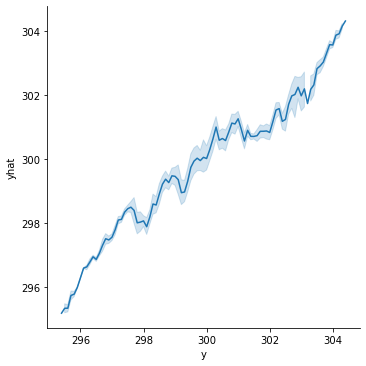

In [397]:
sns.relplot(x='y',y='yhat',markers=True, kind="line",data=test_x)

In [ ]:
# Predicting some new instances

In [252]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
def transformation(df):
    x=df.drop(['Air temperature [K]','UDI','Product ID'],axis=1)
    
    x_num=x[['Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']]
    x_cat_notransform=x[['Machine failure','TWF','HDF','PWF','OSF','RNF']]
    x_cat_transform=x[['Type']]

    num_attributes=list(x_num)
    cat_attribute_trans=list(x_cat_transform)
    cat_attribute_notrans=list(x_cat_notransform)
    num_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaller',StandardScaler()),])
    
    x_num['Tool wear [min]']=x_num['Tool wear [min]'].replace(0.,np.nan)
    x_num_transform=num_pipeline.fit_transform(x_num)
    #.print(x_num_transform)

    
    full_pipeline=ColumnTransformer([
    ("num",num_pipeline,num_attributes),
    ("cat",OneHotEncoder(),cat_attribute_trans),])
    
    x_prepared=full_pipeline.fit_transform(x)
    x_prepared_df=pd.DataFrame(x_prepared,columns=['Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]','Type1','Type2','Type3'])
    x=pd.concat((x_prepared_df,x_cat_notransform),axis=1) 
    x.drop('Machine failure',axis=1,inplace=True) # dropping due to multi-colinearity
    return (x)

In [259]:
data={'UDI':[1,2,3],'Product ID':[1,1,2],'Air temperature [K]':[298.0,299.0,300.0],'Type':['L',"M",'H'],
      'Process temperature [K]':[300.,307.7,306.6],'Rotational speed [rpm]':[1550,1552,1551],'Torque [Nm]':[41,40,40],
      'Tool wear [min]':[3,5,4],'Machine failure':[0,1,0],'TWF':[0,1,1],'HDF':[0,0,1],'PWF':[0,1,1],'OSF':[0,1,1],'RNF':[0,0,1]}
df=pd.DataFrame(data)
#print(df.shape)
x=transformation(df)
#print(x)
#restroing the model
model = pickle.load(open('linear_reg.sav','rb'))
print(model.predict(x))

[297.50613411 301.53267786 302.54278376]


<ipython-input-252-258fb56dccc2>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_num['Tool wear [min]']=x_num['Tool wear [min]'].replace(0.,np.nan)


# Let us apply Regularizations

In [422]:
from sklearn.linear_model import Ridge,Lasso ,RidgeCV,LassoCV , ElasticNet , ElasticNetCV,LinearRegression
lassocv = LassoCV(alphas=None,cv= 50 , max_iter=200000, normalize=True)
lassocv.fit(train_x,train_y)

LassoCV(cv=50, max_iter=200000, normalize=True)

In [423]:
lassocv.alpha_

0.0001386052198670373

In [424]:
lasso = Lasso(alpha=lassocv.alpha_)
lasso.fit(train_x,train_y)
print(lasso.score(train_x,train_y))
print(lasso.score(test_x,test_y))

0.7792932449067382
0.7609188668298045


In [426]:
ridgecv = RidgeCV(alphas=np.random.uniform(0,10,50),cv = 50 , normalize=True)
ridgecv.fit(train_x,train_y)

RidgeCV(alphas=array([5.72809356, 4.71863817, 5.40884022, 8.60430163, 2.69994023,
       9.85152121, 0.54646258, 4.48508463, 6.57919011, 0.14145809,
       7.86848083, 9.53088232, 5.18662617, 2.72113643, 0.2794684 ,
       7.66105567, 3.73447071, 4.4141654 , 4.61127274, 2.30453638,
       5.3160662 , 2.09390555, 3.01854958, 8.62053783, 6.99512272,
       0.22310644, 4.86101586, 6.57209433, 4.34402059, 2.45125143,
       4.39740512, 6.17100682, 7.96386594, 7.06577132, 7.27786554,
       7.02925311, 3.31999832, 3.0932337 , 9.7336286 , 2.56385084,
       8.35605457, 6.82754019, 2.39636033, 5.93716733, 2.61202175,
       6.80141525, 0.41028416, 3.62323966, 8.55035587, 1.57737552]),
        cv=50, normalize=True)

In [ ]:
ridgecv.alpha_

In [428]:
ridge_lr = Ridge(alpha=ridgecv.alpha_)
ridge_lr.fit(train_x,train_y)
print(ridge_lr.score(train_x,train_y))
print(ridge_lr.score(test_x,test_y))

0.7792961921342716
0.7608986097906363


In [431]:
elastic= ElasticNetCV(alphas=None, cv = 50 )
elastic.fit(train_x,train_y)

ElasticNetCV(cv=50)

In [432]:
elastic.alpha_

0.003521020014950716

In [433]:
elastic.l1_ratio_

0.5

In [436]:
elastic_lr = ElasticNet(alpha=elastic.alpha_ , l1_ratio=elastic.l1_ratio_)
elastic_lr.fit(train_x,train_y)
print(elastic_lr.score(train_x,train_y))
print(elastic_lr.score(test_x,test_y))

0.778827511145127
0.7610814531712039
